# Random Forest Regression

Here we train group of Decision tree's, so its called forest.(group of tree's is forest).
Random word came as sampling of data randomly and on that sampled data we apply decision tree.
Here, we take multiple base model and put them together for powerful prediction.
In random forest the base model is Decision tree.

Gives good results on allmost all the machine learning problem.
Random forest can be applied to regerssion as well as classification problems.

It's a bagging(Bootstrapped Aggregation) techinque. If in bagging Techinique we use decission tree, then it is called Random Forest

In Bootstrapped -> We do Sampling.
Let we have 1000 rows in a dataset, we will give this dataset to base model to get train, we won't give all the data to one base model but instead we give some samples of dataset to every base model.
This sample data get selected randomly. Let we have to give 500 data to each base model, then we will create sample of the data.

The sampling of the data happens in three ways:
1. Row Sampling:
   Ex: let say you have decided, u will give 500 rows to every base model.
       and those 500 rows get selected randomly.
       Here selection can happens in two ways:
            1. with repetition : mens here the possibility of having duplicate dataset
            2. without repetition : means here we will not have any duplicate rows.
2. Column sampling:
       let there be 10 column and u have decided that every base model get 5 columns only.
       this is also called features sampling.
       Here selection can happens in two ways:
            1. with repetition : mens here the possibility of having duplicate dataset
            2. without repetition : means here we will not have any duplicate rows.   
3. Combination sampling:
       On the basis of row and column we do sampling here.
       taking the subset of rows and column both.

Now the sampled data is given to base models to get train. The structure of every decision tree(base model) is different since the sampled data given for training is different from different base model.

Next Step we use Aggregation(this is used for prediction).
Now we have all the trained decision tree(base model).
we give a test data to every decision tree and ask for the output. 
let we are seeing classification ->
Then we see how many of them given 1 and how many of then given 0.And lets take there were 100 decision tree created out of which 43 gave the output 1 and 57 gave the output 0. On this we can conclude the output will be 0 as more number of decision tree gave the output 0.
for regression ->
now instead of 0 or 1 we would be getting a number from every decision tree(base model). and then we calculate the mean of those output and get the regression output.

Ensemble Learning:
Ensemble learning is when you take multiple algorithms or the same algorithm multiple times and
you put them together to make something much more powerful than the original.

 Steps:
 1. Pick at random K data points from the training set.
 2. Build the Decision Tree associated to these K data points.
 3. Choose the number of tress you want to build and repeat Step 1&2.
 4. For a new data point make each one of your Ntree predict the values of Y to for the data point in question, and assgn       the new data point the average across all of the predicted Y values.

In [37]:
import pandas as pd

# Importing Dataset

In [38]:
dataset = pd.read_csv("Datasets\T04_Position_Salaries.csv")
X_features = dataset.iloc[:, 1:-1].values
y_outcome =  dataset.iloc[:, [-1]].values

In [39]:
#Printing X_features and y_outcome
print("X_features ->\n", X_features.reshape(1, len(X_features)))
print("y_outcome ->\n", y_outcome.reshape(1, len(y_outcome)))

X_features ->
 [[ 1  2  3  4  5  6  7  8  9 10]]
y_outcome ->
 [[  45000   50000   60000   80000  110000  150000  200000  300000  500000
  1000000]]


# Training The Random Forest Regression Model on the whole dataset

Importing library

In [40]:
from sklearn.ensemble import RandomForestRegressor

Making Regressor Object and training the model

In [41]:
randomForestRegressor = RandomForestRegressor(n_estimators=10, random_state=0)
randomForestRegressor.fit(X_features, y_outcome.ravel()) # y_outcome should be 1D array, so using ravel() to make it 1D

RandomForestRegressor(n_estimators=10, random_state=0)

# Predicting a new result

In [42]:
randomForestRegressor.predict([[6.5]])

array([167000.])

# Visualising The Random Forest Regression results(higher resolution)

Importing library for graph visualization

In [43]:
import matplotlib.pyplot as plt
import numpy as np

Ploting the graph

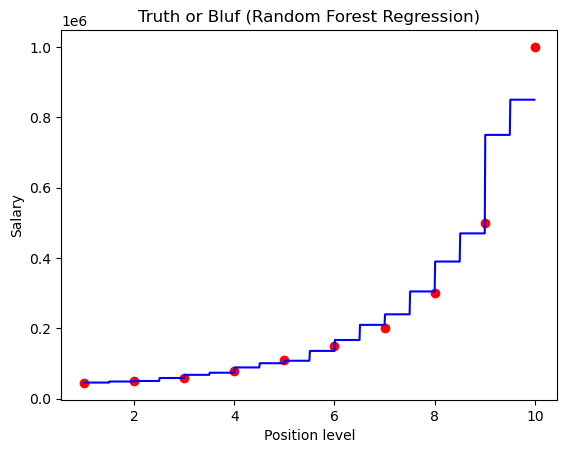

In [44]:
X_grid = np.arange(min(X_features), max(X_features), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_features, y_outcome, color="red")
plt.plot(X_grid, randomForestRegressor.predict(X_grid), color="blue")
plt.title("Truth or Bluf (Random Forest Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

here we will find more steps than what we gor in Decision tree